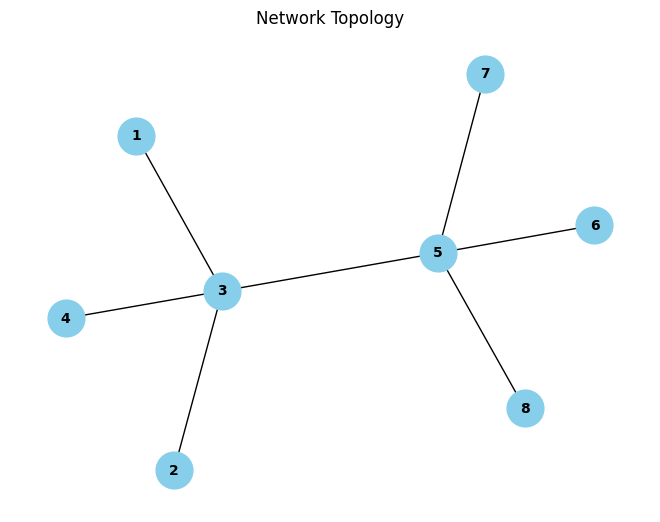

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges
edges = [(1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7), (5, 8)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

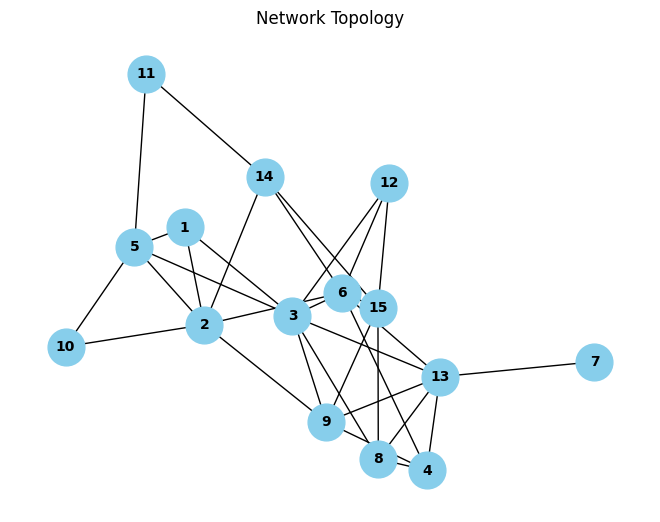

In [2]:
import random

def generate_network_topology(num_nodes):
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(1, num_nodes + 1))

    # Create connections based on the specified topology
    for i in range(1, num_nodes + 1):
        connected_to = random.sample(range(1, num_nodes + 1), random.randint(1, min(4, num_nodes)))
        if i in connected_to:
            connected_to.remove(i)  # Remove self-connections if present
        for node in connected_to:
            G.add_edge(i, node)

    return G

# Generate a network with 8 nodes
num_nodes = 15
network = generate_network_topology(num_nodes)

# Draw the graph
pos = nx.spring_layout(network)  # positions for all nodes
nx.draw(network, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", linewidths=1, arrows=False)

# Show the graph
plt.title("Network Topology")
plt.show()

In [3]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print betweenness centrality for each node
print("Node\tBetweenness Centrality")
for node, centrality in betweenness_centrality.items():
    print(f"{node}\t{centrality:.4f}")

important_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > 0]
nds = []
centr = []
for n, c in betweenness_centrality.items():
    nds.append(n)
    centr.append(c)


Node	Betweenness Centrality
1	0.0000
2	0.0000
3	0.7143
4	0.0000
5	0.7143
6	0.0000
7	0.0000
8	0.0000


In [4]:
# Import the required module
from networkx.algorithms.community import greedy_modularity_communities

# Find the communities in the graph
communities = greedy_modularity_communities(G)

# Print the communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({1, 2, 3, 4})
Community 2: frozenset({8, 5, 6, 7})
